Utils imported successfully.
Synthetic Data Created: 100 points
Initializing Model...
Training (Fast demo)...
Training GP for 50 epochs...
Instructions for updating:
`jitter` is deprecated; please use `marginal_fn` directly.
Epoch 0: Loss = 16.2159
Forecasting 20 steps ahead...


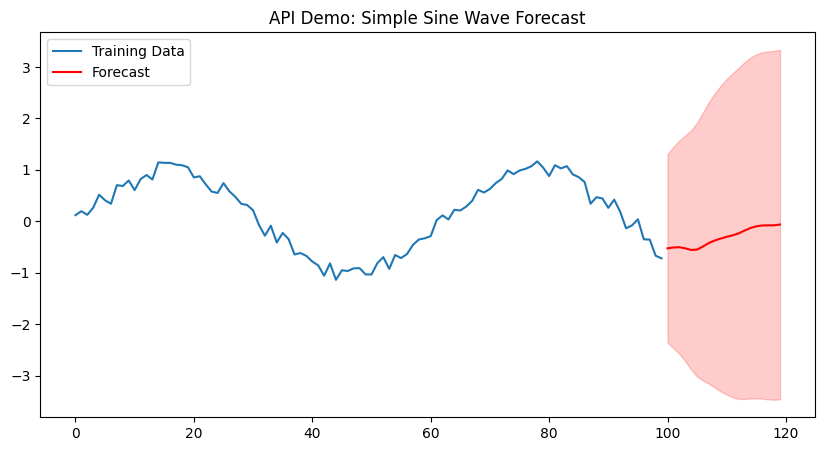

In [1]:
# ==========================================
# API Demo: TFP_Time_Series
# ==========================================
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# 1. Setup Environment
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # Force CPU
sys.path.append(os.getcwd())

# 2. Import the Tool
import utils_tfp

print("Utils imported successfully.")

# ==========================================
# 3. Create Synthetic Data (Toy Example)
# ==========================================
# Generate a simple sine wave to demonstrate the API
X_synth = np.linspace(0, 50, 100)
y_synth = np.sin(X_synth / 5.0) + np.random.normal(0, 0.1, size=X_synth.shape)

print(f"Synthetic Data Created: {len(X_synth)} points")

# ==========================================
# 4. Initialize & Train
# ==========================================
print("Initializing Model...")
# The user simply passes the data to the wrapper
model = utils_tfp.TFP_GaussianProcess_Forecaster(train_values=y_synth)

print("Training (Fast demo)...")
model.train(epochs=50, learning_rate=0.1)

# ==========================================
# 5. Predict & Visualize
# ==========================================
horizon = 20
print(f"Forecasting {horizon} steps ahead...")
mean, std = model.predict(horizon)

# Quick Plot
plt.figure(figsize=(10, 5))
plt.plot(y_synth, label='Training Data')
plt.plot(np.arange(100, 120), mean, label='Forecast', color='red')
plt.fill_between(np.arange(100, 120), mean - 2*std, mean + 2*std, color='red', alpha=0.2)
plt.title("API Demo: Simple Sine Wave Forecast")
plt.legend()
plt.show()